<a href="https://colab.research.google.com/github/ajayjai30/CNN-CLASSIFICATION-USING-CUSTOM-DATA/blob/main/CNN_model_with_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot

Downloading all the dependencies and setup

In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


#Step-1
Importing all the necessary libraries
*   tensorflow-for deep learning models backend support
*   keras- works on top of tensorflow which can be used to code easier
*   os- for creating the directory path
*   imghdr- recognizes the images based on the first few bytes(working on the extensions)
*   opencv(cv2) for reading the images
*   livelossplot- for plotting losses and accuracy using keras api
*   tensorflow-gpu- for enhancing the training of the deep learning models using gpu for the training purpose


In [ ]:
import tensorflow as tf
import os
import imghdr
from keras.utils import image_dataset_from_directory
import cv2
import matplotlib.pyplot as plt
import livelossplot
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Activation,Dense
from keras.models import Sequential
from keras import optimizers,regularizers
from keras.callbacks import LearningRateScheduler
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_dir='/content/drive/MyDrive/DATASET_FOR_FACIAL_EMOTION_DETECTION/shortcut'

In [ ]:
os.listdir(input_dir)

['SAD', 'HAPPY']

In [ ]:
extensions=['jpeg','jpg','bmp','png']

The below code is used for processing of the images and to remove the image formats that are not in the below mentioned formats
*  jpeg
*  jpg
*  bmp
*  png

In [ ]:
for image_class in os.listdir(input_dir):
  for image in os.listdir(os.path.join(input_dir,image_class)):
    img_path=os.path.join(input_dir,image_class,image)
    try:
        image=cv2.imread(img_path)
        extension=imghdr.what(img_path)
        if extension not in extensions:
          print('Image not in the required extension {}'.format(img_path))
          os.remove(img_path)
    except Exception as e:
          print("This image has issues with it {}".format(img_path))
          os.remove(img_path)

image_dataset_from_directory- this function from keras is used to build the dataset from the raw images directly taking from its directory


In [ ]:
fin_data=image_dataset_from_directory(input_dir)

Found 810 files belonging to 2 classes.


Making an copy of the data for visualizing the images

In [ ]:
fin_data_copy=fin_data

Here the scaling process is done at the time of intial batch separation

In [ ]:
fin_data=fin_data.map(lambda x,y:(x/255,y))

as.numpy.iterator - it is used to separate the datasets into batches and with the help of next function, the next batches can be extracted

In [ ]:
batch=fin_data.as_numpy_iterator()

In [ ]:
data_batch=batch.next()

the outuput of the function as_numpy_iterator converts all the data along with its labels, into numpy arrays, and adds them all inside a tuple

In [ ]:
data_batch[0].shape

(32, 256, 256, 3)

In [ ]:
data_batch[0]

array([[[[0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         ...,
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ]],

        [[0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         ...,
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ]],

        [[0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         ...,
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ]],

        ...,

        [[0.9019608 , 0.9019608 , 0.9019608 ],
         [0.9019608 , 0.9019608 , 0.9019608 ]

The above numpy array shows one of the batches generated by numpy iterator

Visualizing some of the images for verification

How many images I can plot:3


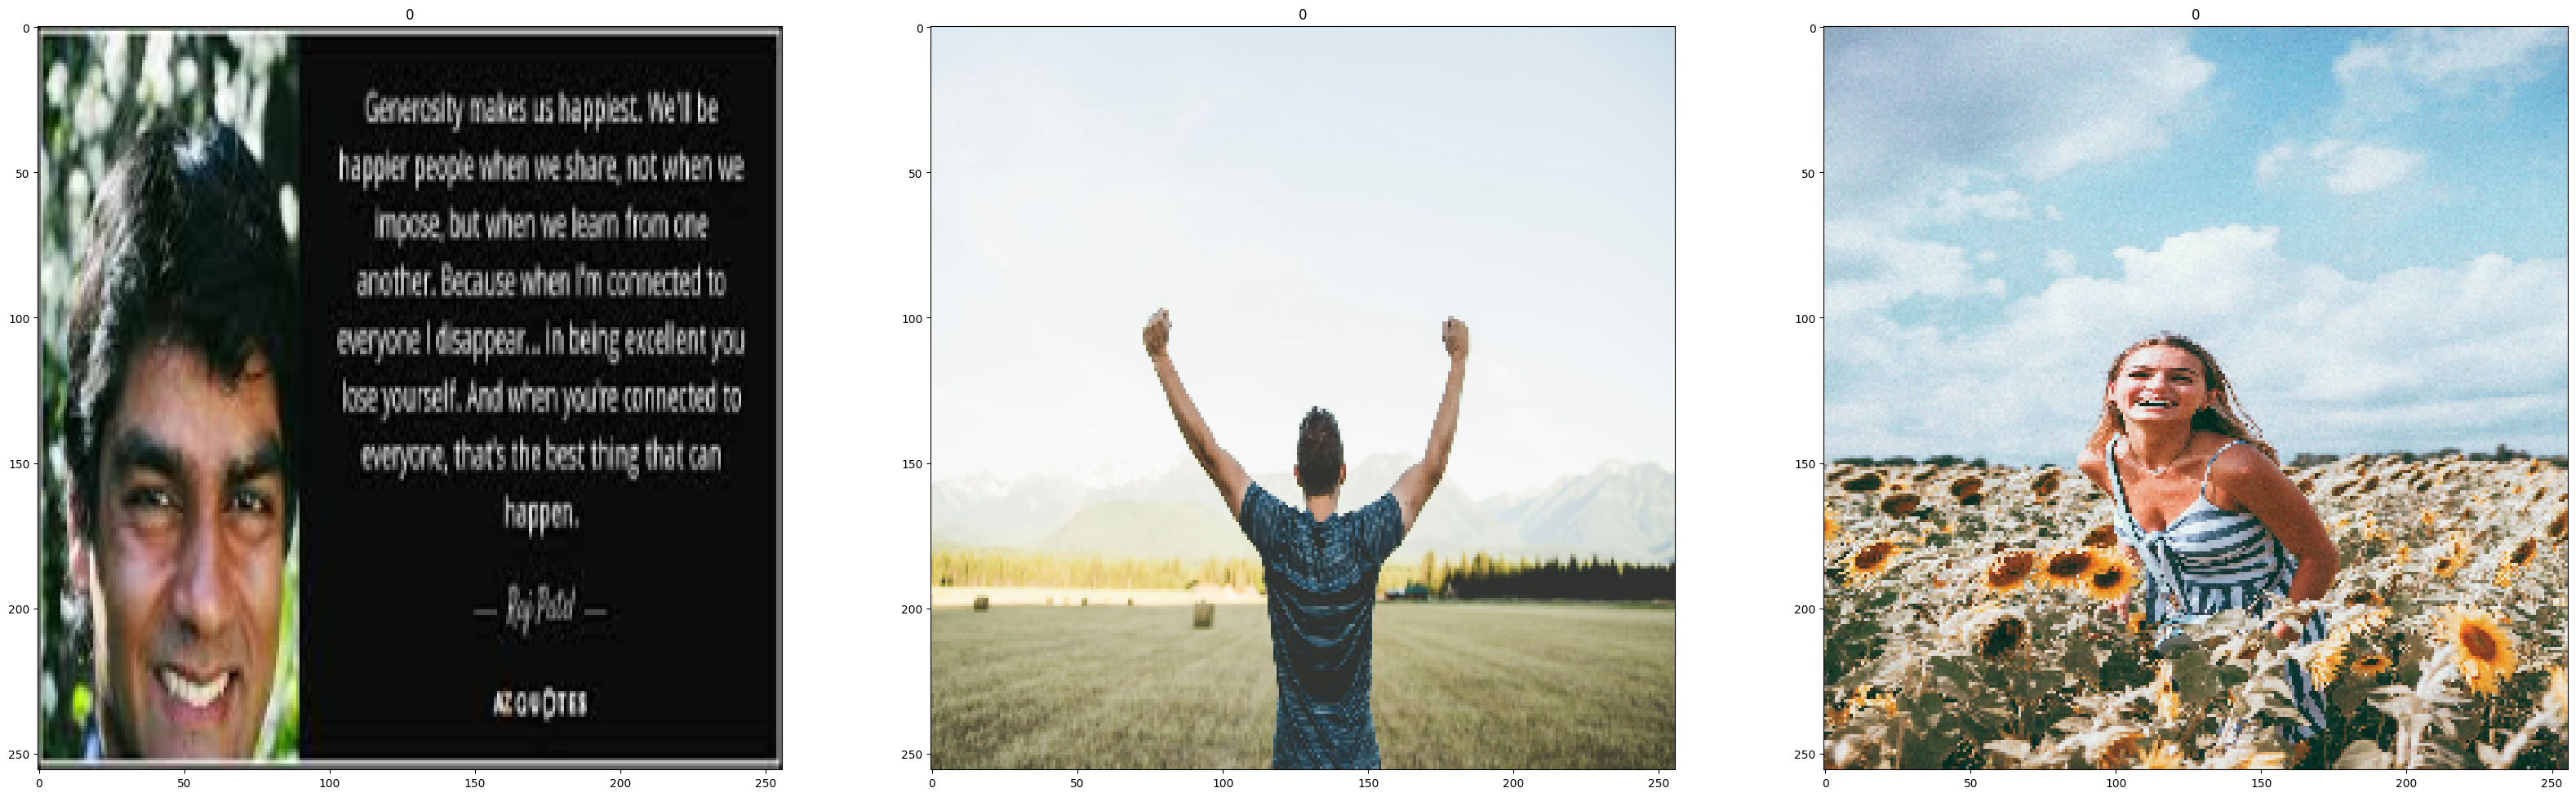

In [ ]:
a=int(input("How many images I can plot:"))
fin_data_copy_batch=fin_data_copy.as_numpy_iterator().next()
fig,axes=plt.subplots(ncols=a,figsize=(40,40))
for i,j in enumerate(fin_data_copy_batch[0][:a]):
  axes[i].imshow(j.astype(int))
  axes[i].title.set_text(fin_data_copy_batch[1][i])
plt.axis('off')
plt.show()

for splitting the dataset batch we are splitting it into 70,20,10 on the total batch and using the concluded value of training_size,testing_size,validation_size.

In [ ]:
training_size=int(len(fin_data)*.7)

In [ ]:
testing_size=int(len(fin_data)*.2)

In [ ]:
validation_size=int(len(data_batch[0])*0.1)

Verifying whether it splitted correctly

In [ ]:
(training_size+testing_size+validation_size)==len(fin_data)

True

so it shows that the above code separated the dataset successfully

Here we are taking the batches from the whole dataset

In [ ]:
training_data=fin_data.take(training_size)

In [ ]:
validation_data=fin_data.skip(training_size).take(validation_size)

In [ ]:
testing_data=fin_data.skip(training_size+validation_size).take(testing_size)

Now the data is split into training, testing,validation sets based on the percentages

Building the model using the keras sequential api for the cnn layer

In [ ]:
model=Sequential()

In [ ]:
#Defining sequential model
model=Sequential()
#block-layer-1
#Block-sublayer-1
model.add(Conv2D(32,(3,3),strides=1,padding='same',kernel_regularizer=regularizers.l2(1e-5),input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#block-sublayer-2
model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#pooling-layerf for block-1
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#block-layer-2
#block-sublayer-1
model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#block-subcode-2
model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#pooling-layer for block-2
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#block-layer-3
#block-sublayer-1
model.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#block-sublayer-2
model.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#pooling-layer for block-3
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))



#Defining the output-layer
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation="softmax"))


Summarizing the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                     

Optimising the algorithm by setting the learning rate and weight decay

In [ ]:
optimizer=optimizers.Adam(learning_rate=0.001,weight_decay=1e-4)

Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

setting the batch size and no of epochs for the model

In [ ]:
Batch_size=32
epochs=100

Also setting the variable learining rate for the model for improving its performance

In [ ]:
def var_lr(epochs):
  lr=0.001
  if epochs>20:
    lr=0.0001
  if epochs>40:
    lr=0.00001
  if epochs>60:
    lr=0.000001
  if epochs>80:
    lr=1e-8
  return lr

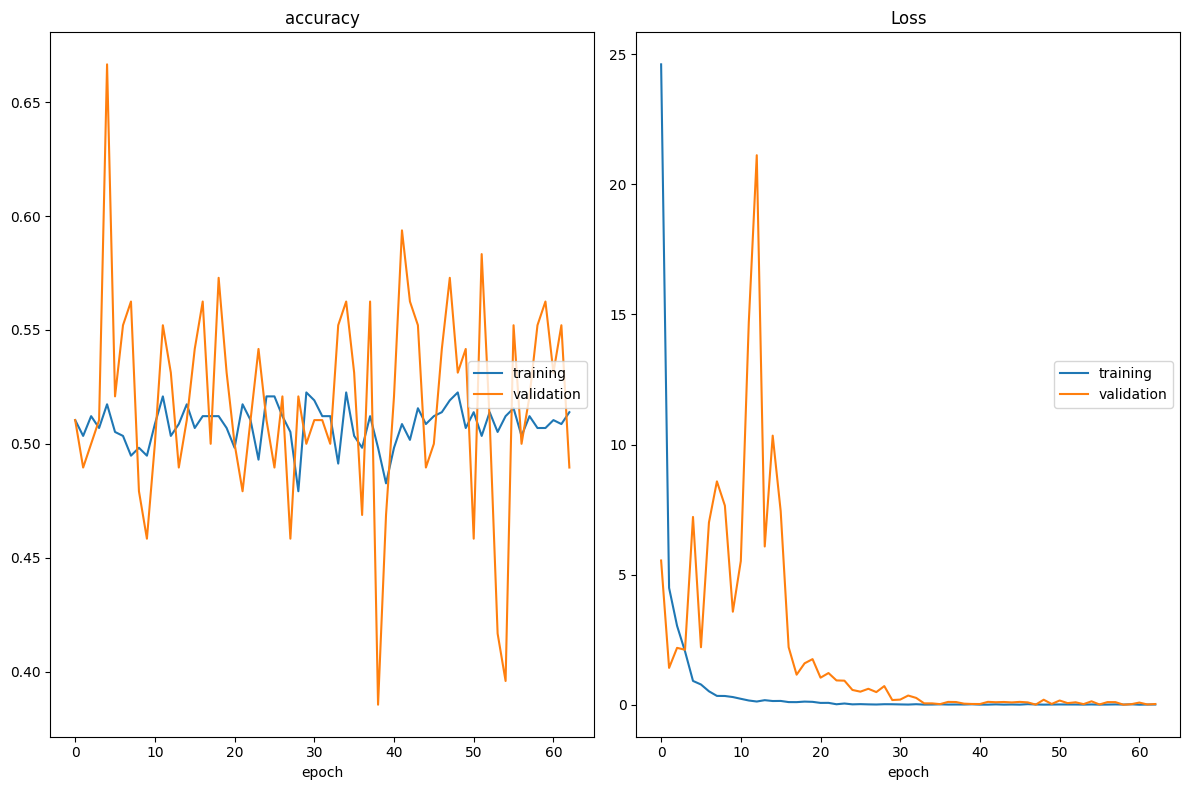

accuracy
	training         	 (min:    0.479, max:    0.523, cur:    0.514)
	validation       	 (min:    0.385, max:    0.667, cur:    0.490)
Loss
	training         	 (min:    0.009, max:   24.605, cur:    0.016)
	validation       	 (min:    0.010, max:   21.115, cur:    0.035)
18/18 [==============================] - 38s 2s/step - loss: 0.0155 - accuracy: 0.5139 - val_loss: 0.0352 - val_accuracy: 0.4896 - lr: 1.0000e-06
Epoch 64/100
15/18 [========================>.....] - ETA: 2s - loss: 0.0150 - accuracy: 0.5104

In [ ]:
model.fit(training_data
          ,verbose=1
          ,validation_data=validation_data
          ,batch_size=Batch_size
          ,epochs=epochs
          ,callbacks=[livelossplot.PlotLossesKeras(),LearningRateScheduler(var_lr)])